# Automated Browsing w/ Form Inputs

In this chapter, we will examine a more advanced use case for [automated browsing](./automated-browsing.ipynb): interacting with pages and submitting web form inputs.

In practice, this can be helpful technique for automating the login process on certain sites, where we enter a username and password and then click a button to login.

In our case, we will write a program to navigate to this book site, initiate a search for a topic of interest, and follow the search results.


## Setup

Installing the `google-colab-selenium` package:

In [1]:
%%capture
!pip install -q google-colab-selenium

## Browsing

Initializing a new instance of the `Chrome` web driver:

In [2]:
from google_colab_selenium import Chrome

driver = Chrome()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Visiting the specified URL:

In [3]:
url = "https://prof-rossetti.github.io/intro-software-dev-python-book/"
driver.get(url)

At this point, the driver has visited the specified page, and can reference certain parts of it, like the title:

In [4]:
print(driver.title)

Intro to Python Programming


We can take a screenshot of the page, using the driver object's `save_screenshot` method, specifying the name of the resulting image file to be created:

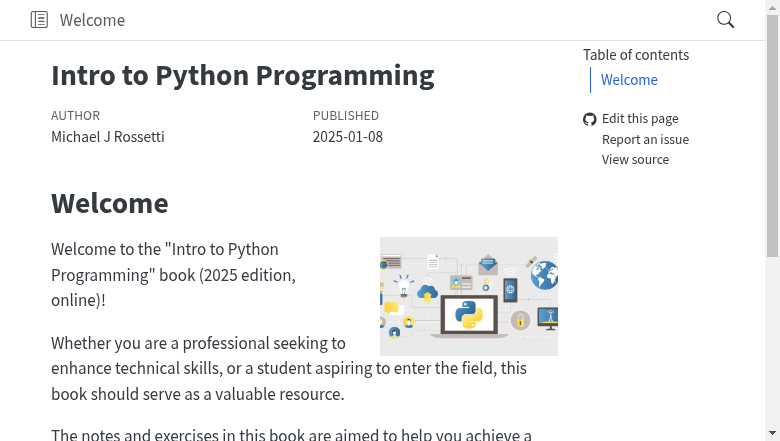

In [5]:
from IPython.display import Image, display

image_filename = "book_page.png"
driver.save_screenshot(image_filename)
display(Image(filename=image_filename, height=300))

The driver's `page_source` property has the HTML contents of the page:

In [6]:
print("PAGE SOURCE:")
print(type(driver.page_source))
print(driver.page_source[0:5], "...", driver.page_source[-7:])

PAGE SOURCE:
<class 'str'>
<html ... </html>


It is possible to write the page source to a file, which might help with troubleshooting:

In [7]:
# save page source as html file to colab filesystem (for inspection):
with open("book_page.html", "w") as f:
    f.write(driver.page_source)

Now that the page source has been written to an HTML file in the Colab filesystem, we can download that file and open it in a browser to inspect the contents further.

## Clicking Buttons

When we inspect the page, we see there is a `<button>` element with a class of `"quarto-search-button"` at the top right corner of the page.

With the driver currently on the home page, we can now programatically locate that search button:

In [8]:
from selenium.webdriver.common.by import By

button_class = "quarto-search-button"
search_button = driver.find_element(By.CLASS_NAME, button_class)
print(type(search_button))

<class 'selenium.webdriver.remote.webelement.WebElement'>


Verifying we have accessed the search button by inspecting its HTML:

In [11]:
print(search_button.get_attribute("outerHTML"))

<button type="button" class="btn quarto-search-button" aria-label="Search" onclick="window.quartoOpenSearch();">
        <i class="bi bi-search"></i>
      </button>


OK, we successfully located the button.

Let's click it:

In [12]:
search_button.click()

## Form Inputs

Inspecting a screenshot of the page in its new state, after the button has been clicked:



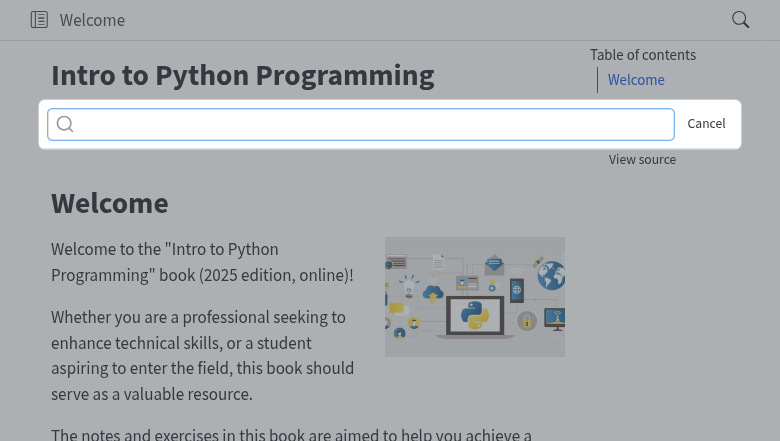

In [13]:
from IPython.display import Image, display

image_filename = "search_box.png"
driver.save_screenshot(image_filename)
display(Image(filename=image_filename, height=300))

We now see a search box we can enter a search term into. When we inspect the contents of the page, we see the search box is an `<input>` element that has a class of `"aa-Input"`.

Let's locate this input element:

In [14]:
from selenium.webdriver.common.by import By

searchbox = driver.find_element(By.CLASS_NAME, "aa-Input")
print(type(searchbox))

<class 'selenium.webdriver.remote.webelement.WebElement'>


In [15]:
print(searchbox.get_attribute("outerHTML"))

<input class="aa-Input" aria-autocomplete="both" aria-labelledby="autocomplete-0-label" id="autocomplete-0-input" autocomplete="off" autocorrect="off" autocapitalize="off" enterkeyhint="search" spellcheck="false" placeholder="" maxlength="512" type="search" aria-activedescendant="autocomplete-0-item-0" aria-controls="autocomplete-0-documents-list">


We found the search box input element.

It is possible to programmatically type in the search box using the `send_keys` method. Here we are initiating a search for the search term "python datatypes":

In [16]:
search_term = "python datatypes"
searchbox.send_keys(search_term) # type in the search box

With this particular website, when we type a search term, we start to see some search results:

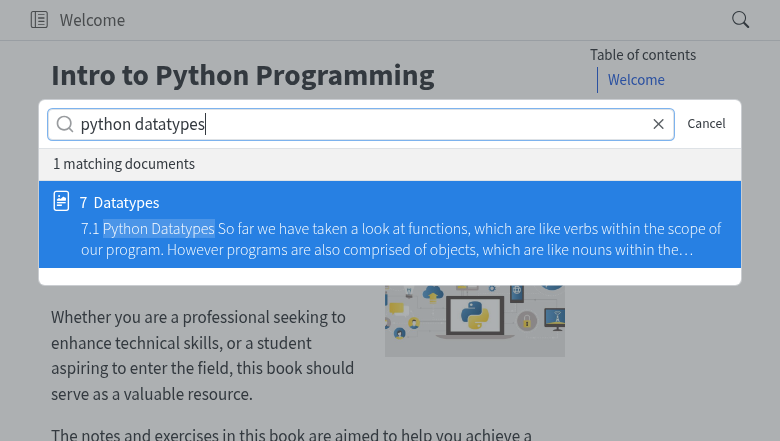

In [17]:
image_filename = "search_results.png"
driver.save_screenshot(image_filename)
display(Image(filename=image_filename, height=300))

On this particular site, pressing enter will navigate to the first search result by default:

In [18]:
from selenium.webdriver.common.keys import Keys

searchbox.send_keys(Keys.RETURN) # press "enter" to initiate search

Now we should be navigated to the page we searched for:

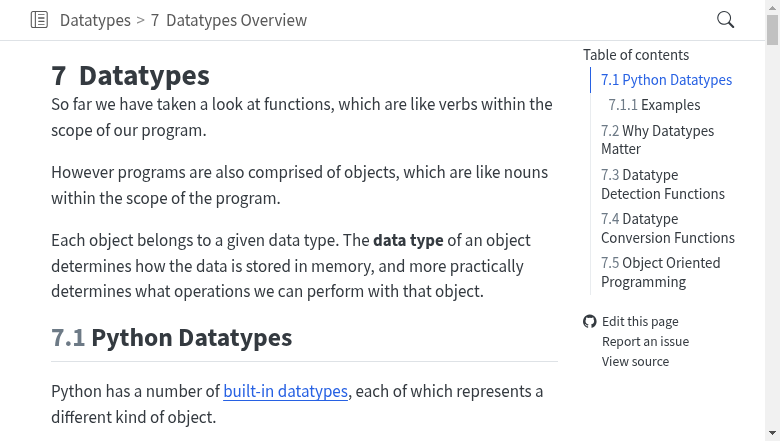

In [19]:
image_filename = "datatypes_page.png"
driver.save_screenshot(image_filename)
display(Image(filename=image_filename, height=300))

We see we have programmatically navigated to a different page, following search results. It is now possible for us to scrape the contents of this page, or further interact with other parts of the page. However for the purposes of this demo, we have acheived our objective of programmatically entering form inputs.

When we are done with the web driver, we invoke its `quit` method, to properly close the browser and save memory (although this is more important and has more pronounced effects when working locally than in Colab):

In [20]:
driver.quit()

Hopefully now you are becoming more confident in using automated browsing to interact with elements like forms and inputs.